In [2]:
import pandas as pd
import numpy as np     # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("dataset/krw_btc.csv")
df_dict = {}
for i in range(len(df)):
    if df["Unnamed: 0"][i][:10] in df_dict:
        df_dict[df["Unnamed: 0"][i][:10]]+=1
    else:
        df_dict[df["Unnamed: 0"][i][:10]]=1

sorted_dict = sorted(df_dict.items(), key= lambda item:item[1], reverse=False)
print(sorted_dict)

[('2017-09-26', 24), ('2017-09-27', 24), ('2017-09-28', 24), ('2017-09-29', 24), ('2017-09-30', 24), ('2017-10-01', 24), ('2017-10-02', 24), ('2017-10-03', 24), ('2017-10-04', 24), ('2017-10-05', 24), ('2017-10-06', 24), ('2017-10-07', 24), ('2017-10-08', 24), ('2017-10-09', 24), ('2017-10-10', 24), ('2017-10-11', 24), ('2017-10-12', 24), ('2017-10-13', 24), ('2017-10-14', 24), ('2017-10-15', 24), ('2017-10-16', 24), ('2017-10-17', 24), ('2017-10-18', 24), ('2017-10-19', 24), ('2017-10-20', 24), ('2017-10-21', 24), ('2017-10-22', 24), ('2017-10-23', 24), ('2017-10-24', 24), ('2017-10-25', 24), ('2017-10-26', 24), ('2017-10-27', 24), ('2017-10-28', 24), ('2017-10-29', 24), ('2017-10-30', 24), ('2017-10-31', 24), ('2017-11-01', 24), ('2017-11-02', 24), ('2017-11-03', 24), ('2017-11-04', 24), ('2017-11-05', 24), ('2017-11-06', 24), ('2017-11-07', 24), ('2017-11-08', 24), ('2017-11-09', 24), ('2017-11-10', 24), ('2017-11-11', 24), ('2017-11-12', 24), ('2017-11-13', 24), ('2017-11-14', 24),

0시~23시 기준 24시간 마다 사고 팔기 (24개의 데이터 존재)

In [5]:
df = pd.read_csv("dataset/krw_btc.csv")
dff = df['open']
price_data=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
price_data1=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
period = 1
for j in range(24):
    a = float(df['open'][24*period])
    btc = 0
    for i in range(j+24*period,len(dff),24):
        price_data1[j].append(dff[i])
        if dff[i] > dff[i-24] or (dff[i]-dff[i-24])/dff[i-24] < -0.1:
            if a != 0:
                price_data[j].append(int(a))
                btc = a/float(dff[i])*0.9996
                a = 0
            
            else:
               price_data[j].append(int(btc*dff[i]))
               
        elif dff[i] <= dff[i-24]:
            if btc != 0:
                a = btc*float(dff[i])*0.9996
                price_data[j].append(int(a))
                btc = 0
            else:
                price_data[j].append(int(a))

    #print(max(a,btc*dff[len(dff)-1]))
    #print(price_data[j])
    #print(len(price_data[j]))
for i in range(len(price_data[0])):
    aaa=0
    bbb=0
    ccc=0
    ddd=0
    for j in range(24):
        aaa+=float(price_data[j][i])
        if j<9 or j>=20:
            bbb+=float(price_data[j][i])
        else:
            ccc+=float(price_data[j][i])
        if j==8 or j==9 or j==7:
            ddd+=float(price_data[j][i])
    aaa/=24
    bbb/=13
    ccc/=11
    ddd/=3
    price_data[24].append(aaa)
    price_data[25].append(bbb)
    price_data[26].append(ccc)
    price_data[27].append(ddd)
aa = []
for i in range(24*period,len(dff),24):
    aa.append(float(dff[i]))
price_data.append(aa)
#print(len(price_data))
#print(len(aa)
#price_data.append(list(price_data1[:]))
    
col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23","average","average_am","average_pm","average_us","open"]
price_array = np.array(price_data)
price_df = pd.DataFrame(price_array.T,columns=col_name)

price_log_df =np.log10(price_df/price_df['open'][0])

dfdf = price_df.shift(-1)
price_per_df = 100*(dfdf-price_df)/price_df
price_per_df.drop([len(price_per_df)-1],axis=0,inplace=True)

col_name1 =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23"]

price_array1 = np.array(price_data1)
price_df1 = pd.DataFrame(price_array1.T,columns=col_name1)
price_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price19,price20,price21,price22,price23,average,average_am,average_pm,average_us,open
0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,...,4377000.0,4377000.0,4377000.0,4377000.0,4377000.0,4.377000e+06,4.377000e+06,4.377000e+06,4.377000e+06,4377000.0
1,4525189.0,4519719.0,4526673.0,4521324.0,4575764.0,4584643.0,4559808.0,4589163.0,4616309.0,4714376.0,...,4683974.0,4475460.0,4494600.0,4515792.0,4519434.0,4.596134e+06,4.540298e+06,4.662121e+06,4.639949e+06,4527000.0
2,4558176.0,4572892.0,4602886.0,4611370.0,4598824.0,4556771.0,4594914.0,4608156.0,4628362.0,4640644.0,...,4538610.0,4536754.0,4545058.0,4545839.0,4556455.0,4.556703e+06,4.578189e+06,4.531311e+06,4.625721e+06,4560000.0
3,4668132.0,4671213.0,4691133.0,4659395.0,4666999.0,4556771.0,4693212.0,4677128.0,4658495.0,4640644.0,...,4538610.0,4621399.0,4608130.0,4606902.0,4647058.0,4.596401e+06,4.648151e+06,4.535242e+06,4.658756e+06,4670000.0
4,4786084.0,4818693.0,4802445.0,4794464.0,4818388.0,4711140.0,4861722.0,4848060.0,4884489.0,4869881.0,...,4666882.0,4768311.0,4767265.0,4732906.0,4744480.0,4.744684e+06,4.795265e+06,4.684907e+06,4.867477e+06,4788000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,727387852.0,462595535.0,328137693.0,607992162.0,321242435.0,367571637.0,234590540.0,579083221.0,995110156.0,508565956.0,...,80761768.0,238738257.0,435413777.0,191489027.0,424585723.0,3.122636e+08,4.549183e+08,1.436717e+08,6.942531e+08,101256000.0
2360,727387852.0,474001536.0,328137693.0,607992162.0,331387939.0,380977161.0,243685512.0,579083221.0,995110156.0,523245018.0,...,81030549.0,238917278.0,435585766.0,192586513.0,418710356.0,3.153806e+08,4.579664e+08,1.468701e+08,6.991461e+08,103330000.0
2361,719350194.0,464314551.0,322358066.0,594949812.0,321595043.0,366178507.0,237909745.0,566144723.0,983716796.0,514923018.0,...,76561914.0,223250821.0,408088765.0,180814440.0,418710356.0,3.071932e+08,4.467217e+08,1.422959e+08,6.882615e+08,102270000.0
2362,719350194.0,464314551.0,322358066.0,594949812.0,321595043.0,366178507.0,237909745.0,566144723.0,983716796.0,514923018.0,...,76561914.0,223250821.0,408088765.0,180814440.0,418710356.0,3.071932e+08,4.467217e+08,1.422959e+08,6.882615e+08,98991000.0


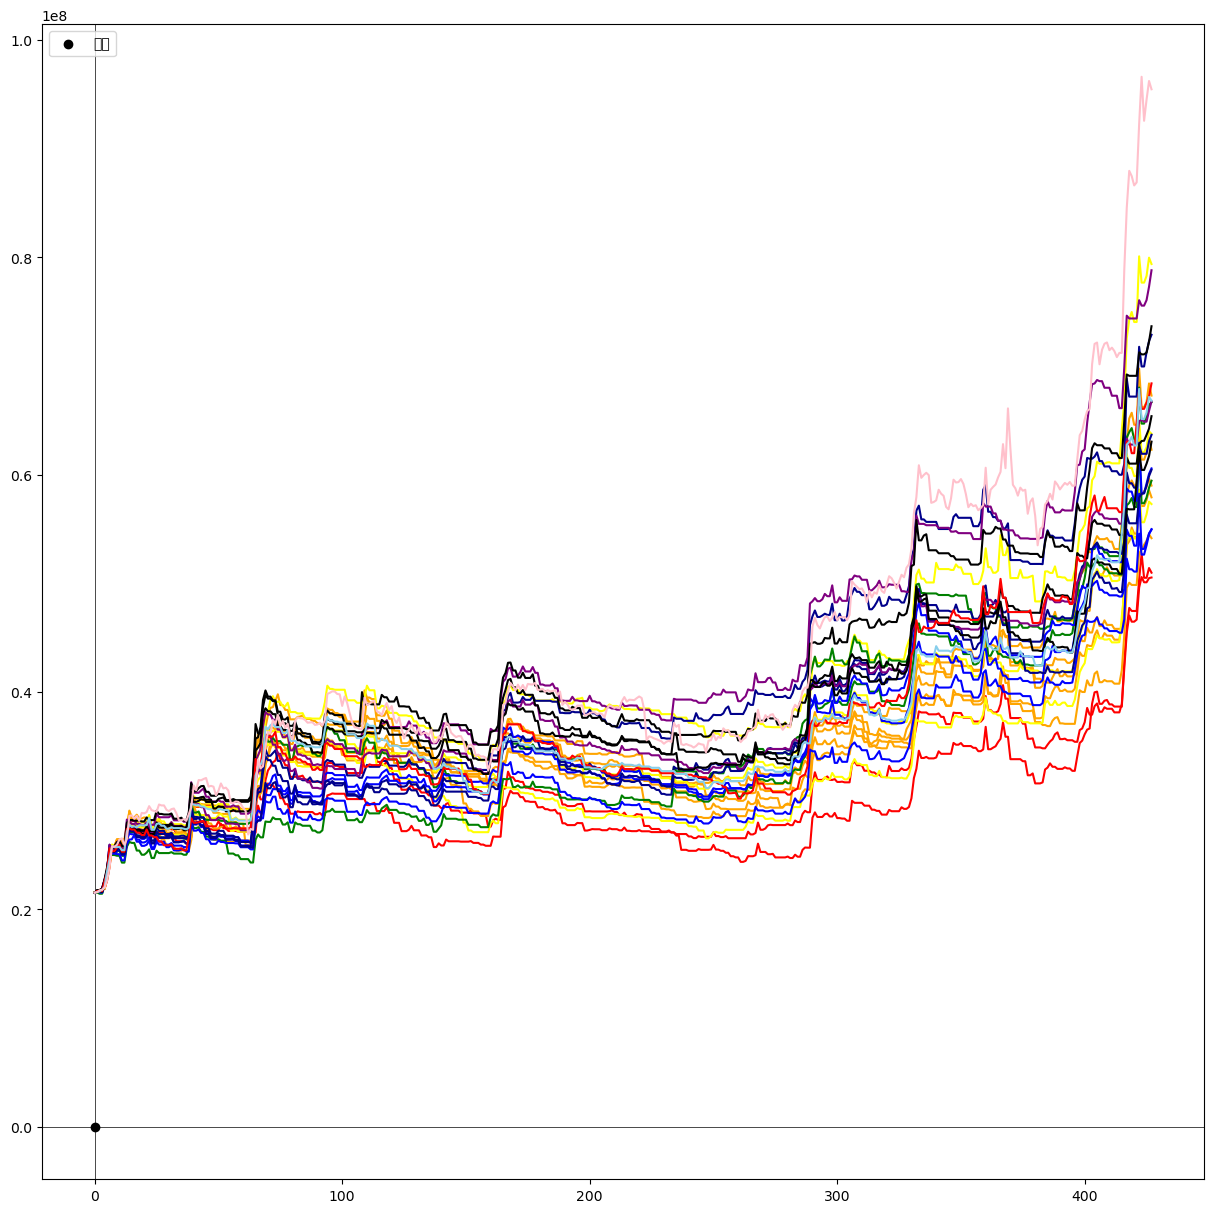

In [45]:
plt.figure(figsize=(15, 15))
plt.axhline(0, color='black',linewidth=0.5)  # x축
plt.axvline(0, color='black',linewidth=0.5)  # y축
plt.scatter(0, 0, color='black', marker='o', label='원점')  # 원점에 점 추가

plt.plot(price_df.index, price_df['price0'], color="red")
plt.plot(price_df.index, price_df['price1'], color="red")
plt.plot(price_df.index, price_df['price2'], color="orange")
plt.plot(price_df.index, price_df['price3'], color="orange")
plt.plot(price_df.index, price_df['price4'], color="orange")
plt.plot(price_df.index, price_df['price5'], color="orange")
plt.plot(price_df.index, price_df['price6'], color="orange")
plt.plot(price_df.index, price_df['price7'], color="yellow")
plt.plot(price_df.index, price_df['price8'], color="yellow")
plt.plot(price_df.index, price_df['price9'], color="yellow")
plt.plot(price_df.index, price_df['price10'], color="green")
plt.plot(price_df.index, price_df['price11'], color="green")
plt.plot(price_df.index, price_df['price12'], color="blue")
plt.plot(price_df.index, price_df['price13'], color="blue")
plt.plot(price_df.index, price_df['price14'], color="blue")
plt.plot(price_df.index, price_df['price15'], color="darkblue")
plt.plot(price_df.index, price_df['price16'], color="darkblue")
plt.plot(price_df.index, price_df['price17'], color="darkblue")
plt.plot(price_df.index, price_df['price18'], color="purple")
plt.plot(price_df.index, price_df['price19'], color="purple")
plt.plot(price_df.index, price_df['price20'], color="black")
plt.plot(price_df.index, price_df['price21'], color="black")
plt.plot(price_df.index, price_df['price22'], color="black")
plt.plot(price_df.index, price_df['price23'], color="red")
#plt.plot(price_df.index, price_df['average'], color="gray")
#plt.plot(price_df.index, price_df['average_am'], color="black")
#plt.plot(price_df.index, price_df['average_pm'], color="silver")
plt.plot(price_df.index, price_df['average_us'], color="skyblue")
plt.plot(price_df.index, price_df['open'], color="pink")
plt.legend(loc='upper left')
plt.show()

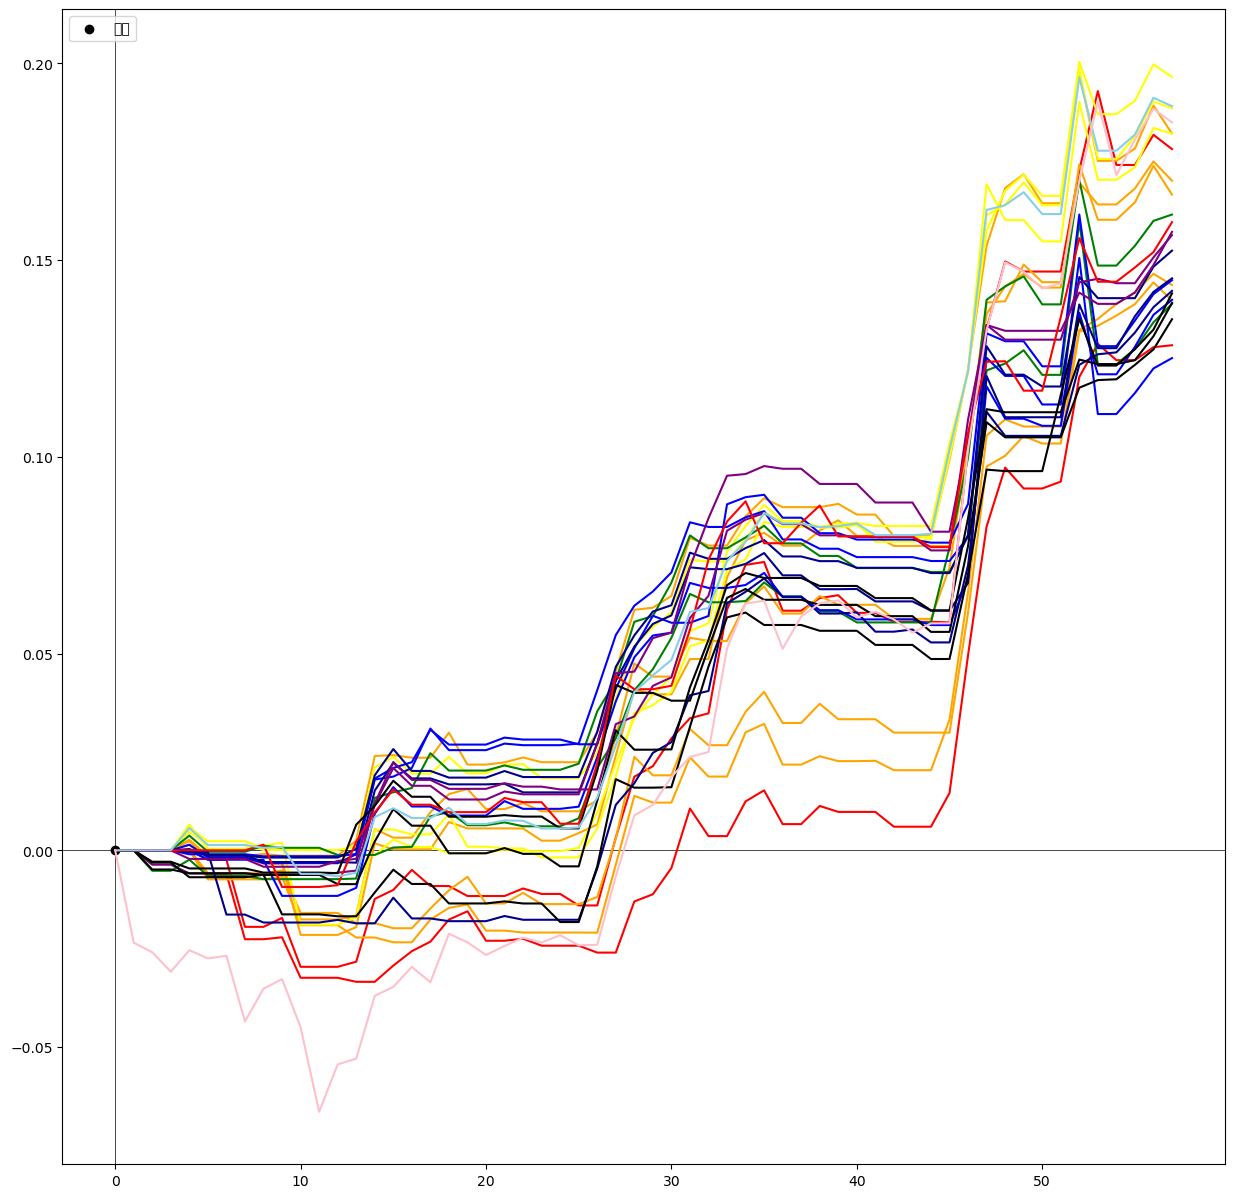

In [39]:
plt.figure(figsize=(15, 15))

plt.axhline(0, color='black',linewidth=0.5)  # x축
plt.axvline(0, color='black',linewidth=0.5)  # y축
plt.scatter(0, 0, color='black', marker='o', label='원점')  # 원점에 점 추가

plt.plot(price_log_df.index, price_log_df['price0'], color="red")
plt.plot(price_log_df.index, price_log_df['price1'], color="red")
plt.plot(price_log_df.index, price_log_df['price2'], color="orange")
plt.plot(price_log_df.index, price_log_df['price3'], color="orange")
plt.plot(price_log_df.index, price_log_df['price4'], color="orange")
plt.plot(price_log_df.index, price_log_df['price5'], color="orange")
plt.plot(price_log_df.index, price_log_df['price6'], color="orange")
plt.plot(price_log_df.index, price_log_df['price7'], color="yellow")
plt.plot(price_log_df.index, price_log_df['price8'], color="yellow")
plt.plot(price_log_df.index, price_log_df['price9'], color="yellow")
plt.plot(price_log_df.index, price_log_df['price10'], color="green")
plt.plot(price_log_df.index, price_log_df['price11'], color="green")
plt.plot(price_log_df.index, price_log_df['price12'], color="blue")
plt.plot(price_log_df.index, price_log_df['price13'], color="blue")
plt.plot(price_log_df.index, price_log_df['price14'], color="blue")
plt.plot(price_log_df.index, price_log_df['price15'], color="darkblue")
plt.plot(price_log_df.index, price_log_df['price16'], color="darkblue")
plt.plot(price_log_df.index, price_log_df['price17'], color="darkblue")
plt.plot(price_log_df.index, price_log_df['price18'], color="purple")
plt.plot(price_log_df.index, price_log_df['price19'], color="purple")
plt.plot(price_log_df.index, price_log_df['price20'], color="black")
plt.plot(price_log_df.index, price_log_df['price21'], color="black")
plt.plot(price_log_df.index, price_log_df['price22'], color="black")
plt.plot(price_log_df.index, price_log_df['price23'], color="red")
#plt.plot(price_log_df.index, price_log_df['average'], color="black")
#plt.plot(price_log_df.index, price_log_df['average_am'], color="gray")
#plt.plot(price_log_df.index, price_log_df['average_pm'], color="black")
plt.plot(price_log_df.index, price_log_df['average_us'], color="skyblue")
plt.plot(price_log_df.index, price_log_df['open'], color="pink")
plt.legend(loc='upper left')
plt.show()

1시간 마다 24시간 단위로 사고 팔기 (전체 평균)

In [581]:
final = 0
final_list = []
for k in range(1,2324):
    df = pd.read_csv("krw_btc.csv")
    dff = df['open']
    price_data=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    period = k
    for j in range(24):
        a = float(df['open'][24*period])
        btc = 0
        for i in range(j+24*period,len(dff),24):
            if dff[i] >= dff[i-24] or (dff[i]-dff[i-24])/dff[i] < -0.1:
                if a != 0:
                    price_data[j].append(int(a))
                    btc = a/float(dff[i])*0.9996
                    a = 0
            
                else:
                    price_data[j].append(int(btc*dff[i]))
               
            elif dff[i] < dff[i-24]:
                if btc != 0:
                    a = btc*float(dff[i])*0.9996
                    price_data[j].append(int(a))
                    btc = 0
                else:
                    price_data[j].append(int(a))

    #print(max(a,btc*dff[len(dff)-1]))
    #print(price_data[j])
    #print(len(price_data[j]))
    for i in range(len(price_data[0])):
        aaa=0
        bbb=0
        ccc=0
        ddd=0
        for j in range(24):
            aaa+=float(price_data[j][i])
            if j<9 or j>=20:
                bbb+=float(price_data[j][i])
            else:
                ccc+=float(price_data[j][i])
            if j==0 or j==1 or j==7 or j==8 or j==9 or j==23:
                ddd+=float(price_data[j][i])
        aaa/=24
        bbb/=13
        ccc/=11
        ddd/=6
        price_data[24].append(aaa)
        price_data[25].append(bbb)
        price_data[26].append(ccc)
        price_data[27].append(ddd)
    
    aa = []
    for i in range(24*period,len(dff),24):
        aa.append(int(dff[i]))
    price_data.append(aa)
    price_data.append(price_data1[k-1:])
    #print(len(price_data))
    #print(len(aa)
    
    col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23","average","average_am","average_pm","average_us","open","optimal"]
    price_array = np.array(price_data)
    price_df = pd.DataFrame(price_array.T,columns=col_name)

    price_log_df =np.log10(price_df/price_df['open'][0])

    dfdf = price_df.shift(-1)
    price_per_df = 100*(dfdf-price_df)/price_df
    price_per_df.drop([len(price_per_df)-1],axis=0,inplace=True)

    final += price_per_df.mean()/price_per_df.std()
    final_now = final/k
    final_list.append(list(final_now))
    print(k,"th finish!")
final_array = np.array(final_list)
final_df = pd.DataFrame(final_array, columns=col_name)
final /= k
print(final)
final_df

1 th finish!
2 th finish!
3 th finish!
4 th finish!
5 th finish!
6 th finish!
7 th finish!
8 th finish!
9 th finish!
10 th finish!
11 th finish!
12 th finish!
13 th finish!
14 th finish!
15 th finish!
16 th finish!
17 th finish!
18 th finish!
19 th finish!
20 th finish!
21 th finish!
22 th finish!
23 th finish!
24 th finish!
25 th finish!
26 th finish!
27 th finish!
28 th finish!
29 th finish!
30 th finish!
31 th finish!
32 th finish!
33 th finish!
34 th finish!
35 th finish!
36 th finish!
37 th finish!
38 th finish!
39 th finish!
40 th finish!
41 th finish!
42 th finish!
43 th finish!
44 th finish!
45 th finish!
46 th finish!
47 th finish!
48 th finish!
49 th finish!
50 th finish!
51 th finish!
52 th finish!
53 th finish!
54 th finish!
55 th finish!
56 th finish!
57 th finish!
58 th finish!
59 th finish!
60 th finish!
61 th finish!
62 th finish!
63 th finish!
64 th finish!
65 th finish!
66 th finish!
67 th finish!
68 th finish!
69 th finish!
70 th finish!
71 th finish!
72 th finish!
7

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price20,price21,price22,price23,average,average_am,average_pm,average_us,open,optimal
0,0.089932,0.081249,0.071840,0.083536,0.075134,0.070140,0.074427,0.087415,0.097158,0.085002,...,0.069099,0.082197,0.068714,0.078497,0.091941,0.100808,0.065689,0.104911,0.049382,0.108667
1,0.089684,0.081006,0.071583,0.083288,0.074795,0.069783,0.074096,0.087039,0.096743,0.084436,...,0.068937,0.082001,0.068481,0.078254,0.091550,0.100460,0.065104,0.104517,0.049182,0.108255
2,0.089570,0.080869,0.071414,0.083108,0.074661,0.069704,0.073947,0.086896,0.096597,0.084347,...,0.068820,0.081883,0.068373,0.078135,0.091397,0.100293,0.065053,0.104364,0.049090,0.108111
3,0.089425,0.080721,0.071258,0.082980,0.074539,0.069669,0.073788,0.086767,0.096501,0.084307,...,0.068695,0.081776,0.068272,0.078003,0.091252,0.100133,0.065026,0.104214,0.048974,0.108016
4,0.089265,0.080539,0.071094,0.082818,0.074369,0.069544,0.073578,0.086575,0.096296,0.084131,...,0.068530,0.081613,0.068131,0.077861,0.091037,0.099912,0.064877,0.104005,0.048845,0.107811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,0.058797,0.056362,0.043266,0.065891,0.062163,0.064101,0.071656,0.078950,0.079009,0.078190,...,0.066733,0.067100,0.050556,0.068200,0.081336,0.082159,0.071364,0.086028,0.055303,0.092517
2319,0.058658,0.056215,0.043054,0.065857,0.062099,0.064017,0.071683,0.078678,0.078927,0.078353,...,0.066538,0.066884,0.050344,0.068094,0.081230,0.081957,0.071406,0.085857,0.055375,0.092670
2320,0.058508,0.056055,0.042820,0.065822,0.062031,0.063929,0.071638,0.078429,0.078676,0.078366,...,0.066169,0.066588,0.050064,0.067785,0.080730,0.081595,0.071235,0.085406,0.055361,NaN
2321,0.058042,0.055783,NaN,0.065545,0.061755,0.063829,0.071359,0.078146,0.078393,0.078581,...,0.065892,0.066311,0.049793,0.067507,0.080313,0.081025,0.071393,0.084710,0.055217,NaN


<Axes: >

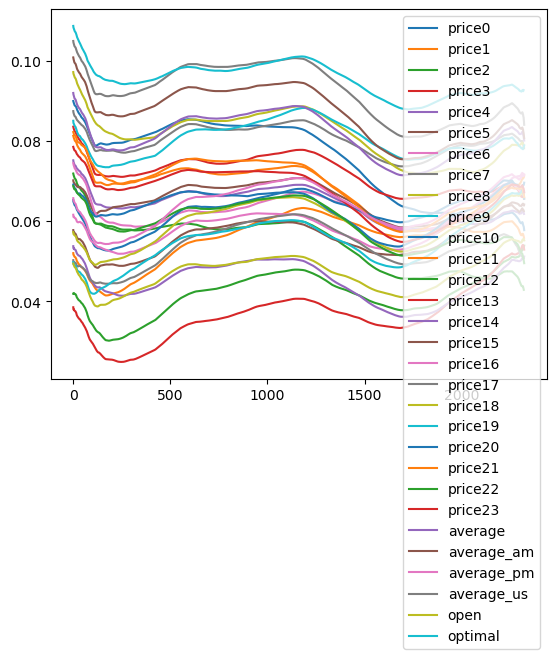

In [582]:
final_df.plot()

In [522]:
final_df.drop([len(final_df)-1],axis=0,inplace=True)
final_df.drop([len(final_df)-1],axis=0,inplace=True)
final_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,0.089932,0.081249,0.071840,0.083536,0.075134,0.070140,0.074427,0.087415,0.097158,0.085002,...,0.057726,0.061555,0.050220,0.057222,0.049720,0.069099,0.082197,0.068714,0.078497,0.049382
1,0.089684,0.081006,0.071583,0.083288,0.074795,0.069783,0.074096,0.087039,0.096743,0.084436,...,0.057233,0.061014,0.049767,0.056737,0.049208,0.068937,0.082001,0.068481,0.078254,0.049182
2,0.089570,0.080869,0.071414,0.083108,0.074661,0.069704,0.073947,0.086896,0.096597,0.084347,...,0.057279,0.061058,0.049756,0.056724,0.049209,0.068820,0.081883,0.068373,0.078135,0.049090
3,0.089425,0.080721,0.071258,0.082980,0.074539,0.069669,0.073788,0.086767,0.096501,0.084307,...,0.057306,0.061083,0.049754,0.056721,0.049212,0.068695,0.081776,0.068272,0.078003,0.048974
4,0.089265,0.080539,0.071094,0.082818,0.074369,0.069544,0.073578,0.086575,0.096296,0.084131,...,0.057243,0.061031,0.049688,0.056645,0.049129,0.068530,0.081613,0.068131,0.077861,0.048845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,0.059133,0.056752,0.043649,0.066166,0.062515,0.064324,0.071809,0.079455,0.079269,0.077911,...,0.062739,0.067458,0.050988,0.066850,0.067389,0.067085,0.067487,0.050934,0.068397,0.055445
2317,0.058928,0.056592,0.043475,0.066073,0.062365,0.064181,0.071633,0.079200,0.079089,0.078044,...,0.062722,0.067281,0.051000,0.066809,0.067455,0.066914,0.067299,0.050751,0.068300,0.055347
2318,0.058797,0.056362,0.043266,0.065891,0.062163,0.064101,0.071656,0.078950,0.079009,0.078190,...,0.062706,0.067091,0.051014,0.066767,0.067527,0.066733,0.067100,0.050556,0.068200,0.055303
2319,0.058658,0.056215,0.043054,0.065857,0.062099,0.064017,0.071683,0.078678,0.078927,0.078353,...,0.062690,0.066888,0.051030,0.066724,0.067608,0.066538,0.066884,0.050344,0.068094,0.055375


<Axes: >

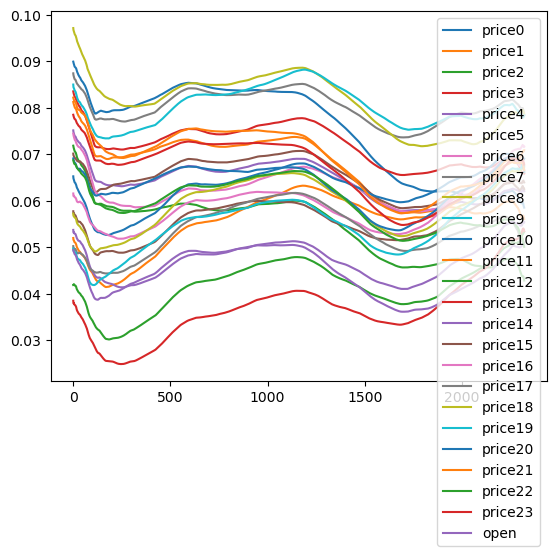

In [523]:
final_df.plot()

In [529]:
pddd=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(final_df)):
    pddd[np.argmax(final_df.T[i])]+=1

print(pddd)

[319, 0, 0, 0, 0, 0, 0, 378, 933, 691, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [555]:
df = pd.read_csv("krw_btc.csv")
dff = df['open']
price_data=[]
period = 1

a = float(df['open'][24*period])
btc = 0
for k in range(24*period,len(dff)-96,24):
    i = k+np.argmax(final_df.T[int((k-24)/24)])
    if dff[i] >= dff[i-24] or (dff[i]-dff[i-24])/dff[i] < -0.1:
        if a != 0:
            price_data.append(int(a))
            btc = a/float(dff[i])*0.9996
            a = 0
            
        else:
            price_data.append(int(btc*dff[i]))
               
    elif dff[i] < dff[i-24]:
        if btc != 0:
            a = btc*float(dff[i])*0.9996
            price_data.append(int(a))
            btc = 0
        else:
            price_data.append(int(a))

In [556]:
print(price_data)
print(len(price_data))
price_data.append(price_data[len(price_data)-1])
print(len(price_data))
price_data.append(price_data[len(price_data)-1])
print(len(price_data))
price_data.append(price_data[len(price_data)-1])
print(len(price_data))
price_data.append(price_data[len(price_data)-1])
print(len(price_data))
price_data1 = price_data

[4377000, 4616309, 4628362, 4658495, 4884489, 4993971, 5036156, 4988961, 4988961, 4988961, 4992998, 5032210, 5245363, 5499738, 5515825, 5587211, 6222647, 6453898, 6578572, 6463377, 6463377, 6335919, 6335919, 6474324, 6808438, 6878414, 6882357, 6868767, 6868767, 6868767, 7106565, 7034724, 7034724, 7210538, 7230270, 7574025, 7917779, 8515975, 8533630, 8671755, 8749645, 8459624, 8459624, 8594478, 8341487, 8341487, 8341487, 8341487, 8341487, 8454113, 9239090, 9654994, 9597632, 9597632, 9597632, 9957086, 9674434, 9674434, 9594453, 9594453, 10173772, 10860764, 11671519, 12480177, 12315824, 12315824, 13011756, 13520712, 13729300, 14091201, 15160218, 19398738, 24420508, 21182170, 18184752, 17302799, 17302799, 16867965, 16867965, 16867965, 18109693, 19961068, 19885919, 19885919, 19885919, 19885919, 19559699, 19559699, 19559699, 19559699, 19559699, 22039246, 21632769, 21632769, 21324876, 21324876, 21324876, 21073090, 21073090, 21501127, 23523417, 29512349, 27656695, 27656695, 27656695, 27656695,

In [614]:
final = 0
final_list = []
for k in range(1,2324):
    df = pd.read_csv("krw_btc.csv")
    dff = df['open']
    price_data=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    period = k
    for j in range(24):
        a = float(df['open'][24*period])
        btc = 0
        for i in range(j+24*period,len(dff),24):
            if dff[i] >= dff[i-24] or (dff[i]-dff[i-24])/dff[i] < -0.1:
                if a != 0:
                    price_data[j].append(int(a))
                    btc = a/float(dff[i])*0.9996
                    a = 0
            
                else:
                    price_data[j].append(int(btc*dff[i]))
               
            elif dff[i] < dff[i-24]:
                if btc != 0:
                    a = btc*float(dff[i])*0.9996
                    price_data[j].append(int(a))
                    btc = 0
                else:
                    price_data[j].append(int(a))

    #print(max(a,btc*dff[len(dff)-1]))
    #print(price_data[j])
    #print(len(price_data[j]))
    
    aa = []
    for i in range(24*period,len(dff),24):
        aa.append(int(dff[i]))
    price_data.append(aa)
    #print(len(price_data))
    #print(len(aa)
    
    col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23","open"]
    price_array = np.array(price_data)
    price_df = pd.DataFrame(price_array.T,columns=col_name)

    price_log_df =np.log10(price_df/price_df['open'][0])
    dfdf = price_df.shift(-1)
    price_per_df = 100*(dfdf-price_df)/price_df
    price_per_df.drop([len(price_per_df)-1],axis=0,inplace=True)

    final += price_per_df.mean()/price_per_df.std()
    final_now = final/k
    final_list.append(list(final_now))
    print(k,"th finish!")
final_array = np.array(final_list)
final_df = pd.DataFrame(final_array, columns=col_name)
final /= k
print(final)
price_per_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,4527000,4527000,4527000,4527000,4527000,4527000,4527000,4527000,4527000,4527000,...,4527000,4527000,4527000,4527000,4527000,4527000,4527000,4527000,4527000,4527000
1,4558176,4578426,4601377,4615312,4547993,4497678,4560028,4543916,4537004,4454416,...,4344472,4340731,4403814,4402106,4384753,4587164,4575990,4555298,4562256,4560000
2,4668132,4676865,4689595,4663378,4615415,4497678,4657580,4611927,4566542,4454416,...,4344472,4340731,4403814,4402106,4384753,4672749,4639491,4616489,4652975,4670000
3,4786084,4824524,4800870,4798563,4765131,4650045,4824811,4780476,4788075,4674453,...,4464690,4440092,4502560,4512344,4508676,4821293,4799709,4742755,4750521,4788000
4,4878048,4914928,4903123,4891690,4853374,4720383,4894490,4863272,4895396,4744250,...,4660920,4619518,4647328,4698391,4701813,4995415,4882749,4874849,4912449,4880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,558404515,310885507,171878095,349255545,205673755,146817876,163171921,348358407,624012046,311675921,...,79625522,96048710,48462153,72490770,42939765,169164960,364600568,153178801,264810679,58948000
2320,560879830,311253643,171688568,351425951,206388069,146808659,163643723,348358407,624233047,311377861,...,79345550,95563309,48356115,72346720,42869026,168592747,364288700,152988415,264155742,59233000
2321,559084246,309987441,171688568,349129749,205404935,145767561,163189391,346542275,619144316,311377861,...,79345550,95563309,48356115,72346720,42869026,168592747,364288700,152988415,264155742,59067000
2322,559084246,309987441,171688568,349129749,205404935,145767561,163189391,346542275,619144316,311377861,...,79345550,95563309,48356115,72228952,42869026,167363353,361780901,151335845,260847039,59323000


In [7]:
import warnings
warnings.filterwarnings(action='ignore')
df = pd.read_csv("dataset/krw_btc.csv")
dff = df['open']
price_data=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
period = 1
for j in range(24):        
    a = float(df['open'][24*period])
    btc = 0
    for i in range(j+24*period,len(dff),24):
        if dff[i] >= dff[i-24] or (dff[i]-dff[i-24])/dff[i] < -0.1:
            if a != 0:
                price_data[j].append(int(a))
                btc = a/float(dff[i])
                a = 0
            
            else:
                price_data[j].append(int(btc*dff[i])-1)
               
        elif dff[i] < dff[i-24]:
            if btc != 0:
                a = btc*float(dff[i])
                price_data[j].append(int(a))
                btc = 0
            else:
                price_data[j].append(int(a)-1)

    #print(max(a,btc*dff[len(dff)-1]))
    #print(price_data[j])
    #print(len(price_data[j]))
    
aa = []
for i in range(24*period,len(dff),24):
    aa.append(int(dff[i]))
price_data.append(aa)
    #print(len(price_data))
    #print(len(aa)
    
col_name =["price0","price1","price2","price3","price4","price5","price6","price7","price8","price9","price10","price11","price12","price13","price14","price15","price16","price17","price18","price19","price20","price21","price22","price23","open"]
price_array = np.array(price_data)
price_df = pd.DataFrame(price_array.T,columns=col_name)

price_log_df =np.log10(price_df/price_df['open'][0])

dfdf = price_df.shift(-1)
price_per_df = 100*(dfdf-price_df)/price_df
price_per_df.drop([len(price_per_df)-1],axis=0,inplace=True)





In [65]:
final = np.zeros(25)
for k in range(0,2323):
    final += np.array(price_per_df[k:2324].mean()/price_per_df[k:2324].std())
final_now = final/(k+1)
final_list.append(final_now)
final_array = np.array(final_list)
final_df1 = pd.DataFrame(final_array, columns=col_name)
final_df1

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,1.089203,1.489870,2.046857,2.797993,0.881833,0.557035,1.022868,0.837886,0.777454,0.474661,...,0.208346,0.224670,0.301857,0.310619,0.278876,2.810533,1.696124,1.076580,1.174910,1.089200
1,1.463070,2.246282,6.669771,2.048600,1.231893,-0.114526,1.435295,1.109170,1.192961,-0.144917,...,-0.256729,-0.249381,-0.215391,-0.211620,-0.225371,4.303637,4.362303,1.707281,1.669995,1.463067
2,11.467607,2.793526,5.110153,1.967761,1.501100,0.627259,2.021736,1.366892,0.902562,0.565130,...,0.306076,0.279502,0.352104,0.368117,0.361033,2.613295,1.726804,1.749072,10.359707,11.467603
3,4.212047,2.866647,8.180992,2.693074,1.992682,1.050706,1.792655,1.656398,1.307309,0.818263,...,1.250196,1.076098,1.524232,1.245094,1.386819,4.825795,2.017373,21.125672,2.566397,4.212044
4,2.790609,4.142012,5.122644,3.715687,2.707897,1.572033,2.324783,17.243065,1.193814,1.905552,...,0.446968,0.455685,0.223524,0.341337,0.226132,0.443756,0.495952,0.339066,0.304060,2.790607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,0.070581,0.067814,0.054251,0.076867,0.073617,0.075619,0.083302,0.090794,0.093654,0.090652,...,0.074846,0.079711,0.063035,0.079801,0.079559,0.080458,0.080327,0.064189,0.082863,0.055717
2319,0.072394,0.068446,0.053924,0.078654,0.074649,0.076097,0.084975,0.090447,0.093821,0.090257,...,0.073528,0.077364,0.062126,0.078972,0.079022,0.079204,0.079938,0.063682,0.082107,0.062940
2320,0.071361,0.067055,0.053699,0.076904,0.073261,0.073379,0.082964,0.089323,0.090846,0.089786,...,0.073073,0.077032,0.061761,0.078456,0.078486,0.078793,0.079463,0.063334,0.081539,0.056046
2321,0.070957,0.066726,0.053490,0.076518,0.072827,0.073052,0.082452,0.089045,0.090420,0.089687,...,0.072677,0.076730,0.061453,0.077500,0.078020,0.076466,0.076929,0.060274,0.078032,0.056824


In [133]:
print(len(dff))
print(len(dff)/24)

55824
2326.0


In [92]:
pddd=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(final_df1)):
    pddd[np.argmax(final_df1.T[i])]+=1

print(pddd)
print(len(final_df1))

[496, 79, 83, 29, 13, 37, 45, 294, 542, 343, 9, 5, 3, 8, 8, 17, 29, 4, 5, 3, 56, 129, 14, 68, 4]
2323


In [126]:
df = pd.read_csv("krw_btc.csv")
dff = df['open']
price_data=[]
arg = []
period = 1
num = 0
a = float(df['open'][24*period+24])
btc = 0
for k in range(24*period+24,len(dff)-24,24):
    i = k+np.argmax(final_df1.T[num])
    arg.append(np.argmax(final_df1.T[num]))
    num+=1
    if dff[i] >= dff[i-24] or (dff[i]-dff[i-24])/dff[i] < -0.1:
        if a != 0:
            price_data.append(int(a))
            btc = a/float(dff[i])*0.9996
            a = 0
            
        else:
            price_data.append(int(btc*dff[i]))
               
    elif dff[i] < dff[i-24]:
        if btc != 0:
            a = btc*float(dff[i])*0.9996
            price_data.append(int(a))
            btc = 0
        else:
            price_data.append(int(a))

In [127]:
print(len(price_data))
price_data1 = price_data

2323


In [128]:
dfdfdfd= pd.DataFrame(price_data1, columns=["optimal"])
dfdfdfd

,optimal
0,4527000
1,4515351
2,4594050
3,4803586
4,4853757
...,...
2318,75775498803
2319,76162641314
2320,76189615181
2321,75568519534


<Axes: >

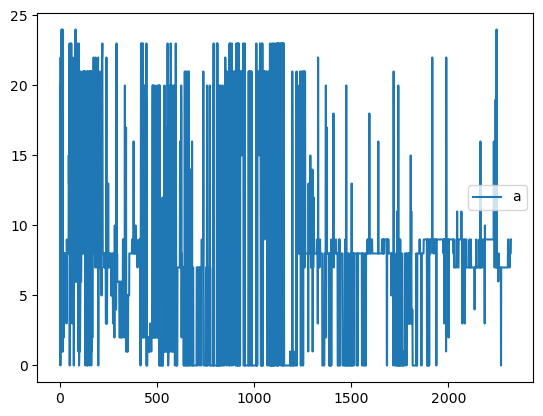

In [129]:
arg_df = pd.DataFrame(arg, columns=["a"])
arg_df.plot()

In [59]:
a =np.array([1,2,3,4])
a[0:2].mean()/a[0:2].std()


3.0

In [61]:
np.array(price_per_df[0:2].mean()/price_per_df[0:2].std())

array([ 1.09515714,  1.5053994 ,  2.07877265,  2.86417661,  0.88364521,
        0.54646527,  1.02671963,  0.83912827,  0.77802961,  0.46855985,
        0.72186971,  0.4178217 , -0.70709261,  0.20961057,  0.20397103,
        0.20330111,  0.21988768,  0.29572353,  0.30470124,  0.27328211,
        2.9083066 ,  1.72215357,  1.08266819,  1.18286374,  1.0891999 ])

In [63]:
price_per_df

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,price15,price16,price17,price18,price19,price20,price21,price22,price23,open
0,3.426982e+00,3.301965e+00,3.460886e+00,3.338634e+00,4.582911e+00,4.785858e+00,4.218209e+00,4.889171e+00,5.509618e+00,7.751017e+00,...,7.259493e+00,7.798652e+00,6.580992,6.881745e+00,7.056134,2.290382,2.727850,3.212200,3.295454,3.427005
1,7.289597e-01,1.176461e+00,1.683654e+00,1.991585e+00,5.039547e-01,-5.681485e-01,7.699220e-01,4.138533e-01,2.610782e-01,-1.524576e+00,...,-3.955143e+00,-4.037834e+00,-2.643251,-2.681002e+00,-3.064611,1.369568,1.122610,0.665376,0.819133,0.728960
2,2.412281e+00,2.150076e+00,1.917204e+00,1.041443e+00,1.482439e+00,0.000000e+00,2.139271e+00,1.496747e+00,6.510500e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.865742,1.387722,1.343285,1.988449,2.412281
3,2.526767e+00,3.157210e+00,2.372806e+00,2.898874e+00,3.243829e+00,3.429027e+00,3.590496e+00,3.654628e+00,4.851237e+00,4.981721e+00,...,2.808255e+00,2.329947e+00,2.283177,2.545186e+00,2.867349,3.178956,3.453339,2.735105,2.096446,2.526767
4,1.921471e+00,1.873825e+00,2.129896e+00,1.940734e+00,1.851850e+00,1.512637e+00,1.444199e+00,1.731959e+00,2.241405e+00,1.493151e+00,...,4.395160e+00,4.041030e+00,3.215241,4.123082e+00,4.283673,3.611512,1.730112,2.785187,3.408620,1.921470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,1.112463e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.196350e-07,1.693764e-01,-2.366520e-02,5.511276e-01,2.451393e-01,...,4.264458e-01,7.765244e-02,0.342047,3.678894e-01,0.508474,0.346776,0.131777,0.162165,0.874298,0.530382
2320,4.834768e-01,1.584784e-01,-3.030865e-02,6.617024e-01,3.874587e-01,3.373530e-02,2.891443e-01,0.000000e+00,3.541619e-02,-5.565372e-02,...,-3.117364e-01,-4.655550e-01,-0.178878,-1.587780e-01,-0.124788,-0.298377,-0.045555,-0.084324,-0.207406,0.483477
2321,-2.802490e-01,-3.669536e-01,-3.625711e-07,-6.136413e-01,-4.365265e-01,-6.694205e-01,-2.377295e-01,-4.417095e-01,-7.755074e-01,-1.925714e-07,...,-7.555400e-07,-6.221875e-07,-0.000001,0.000000e+00,-0.000001,0.000000,0.000000,0.000000,0.000000,-0.280249
2322,0.000000e+00,-2.009605e-07,0.000000e+00,-1.797996e-07,-3.002854e-07,0.000000e+00,-3.814194e-07,-1.806193e-07,-9.953984e-08,1.925714e-07,...,0.000000e+00,0.000000e+00,0.000000,-8.286483e-02,0.000000,-0.649745,-0.608913,-1.001009,-1.173512,0.433406
